## TP 4 MONTE CARLO 

#### Importation des bibliothéques:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon,t


#### Les paramétres:

In [2]:
np.random.seed(29)
M = 10000
rho = 0.5
n=3

# Exercice 1

1. Créer un vecteur aléatoire(U,V) dont la loi est donnée par une copule gaussienne de paramètre 𝜌


In [3]:
K = np.array([[1, rho], [rho, 1]])
A = np.linalg.cholesky(K).T
Z = np.random.normal(size=(2, M))
X = A @ Z
U = norm.cdf(X[0, :])
V = norm.cdf(X[1, :])


2. Vérifier que 𝑈 et 𝑉 suivent bien des lois uniformes sur [0,1].

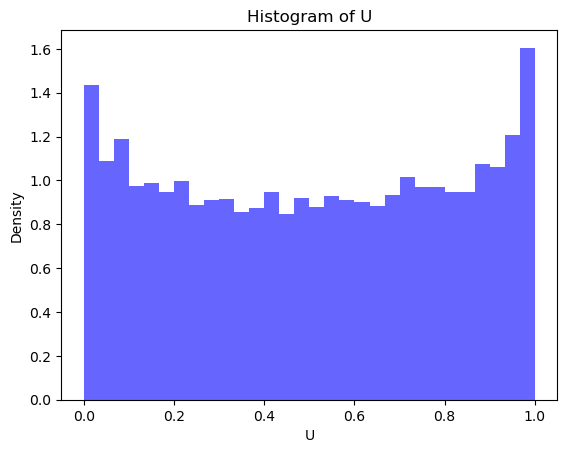

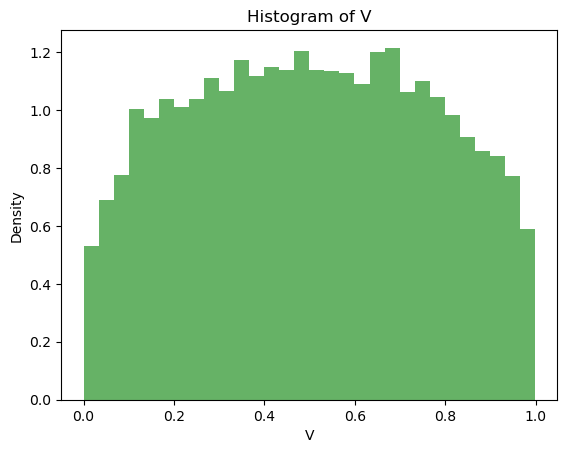

In [4]:
plt.hist(U, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Histogram of U')
plt.xlabel('U')
plt.ylabel('Density')
plt.show()

plt.hist(V, bins=30, density=True, alpha=0.6, color='green')
plt.title('Histogram of V')
plt.xlabel('V')
plt.ylabel('Density')
plt.show()


3. Calculer numériquement le coefficient de corrélation linéaire
𝜌_𝑠 de
(
𝑈
,
𝑉
)

In [5]:
empirical_correlation = np.corrcoef(U, V)[0, 1]
print(f"Empirical correlation (rho_s): {empirical_correlation}")


Empirical correlation (rho_s): 0.4252792547319864


# EXERCICE 2 : Simulation des lois Exponentielle et Pareto


- 1. Simuler un vecteur
(
𝑋
,
𝑌
) avec des marginales

In [6]:
X2 = np.random.multivariate_normal([0, 0], K, size=M)
U1 = norm.cdf(X2[:, 0])
V1 = norm.cdf(X2[:, 1])
X1 = expon.ppf(U1, scale=1/2)
def qpareto(x, alpha=3):
    return (1 - x) ** (-1 / alpha)

Y = qpareto(V1)


2. Vérifier que les lois marginales sont celles souhaitées.

#### Histogramme de 𝑋 ( Exponentielle)

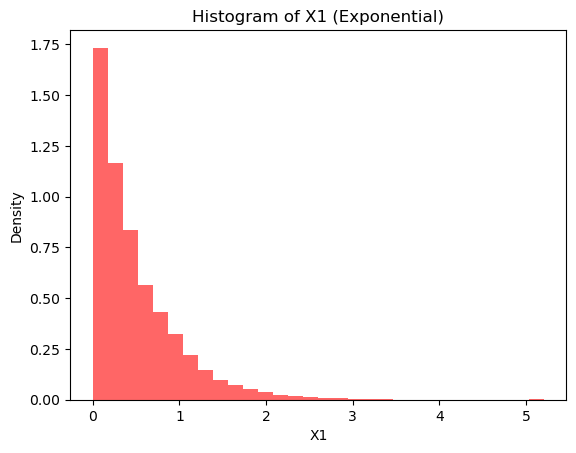

In [7]:
plt.hist(X1, bins=30, density=True, alpha=0.6, color='red')
plt.title('Histogram of X1 (Exponential)')
plt.xlabel('X1')
plt.ylabel('Density')
plt.show()


#### Histogramme de 𝑌 (Pareto)

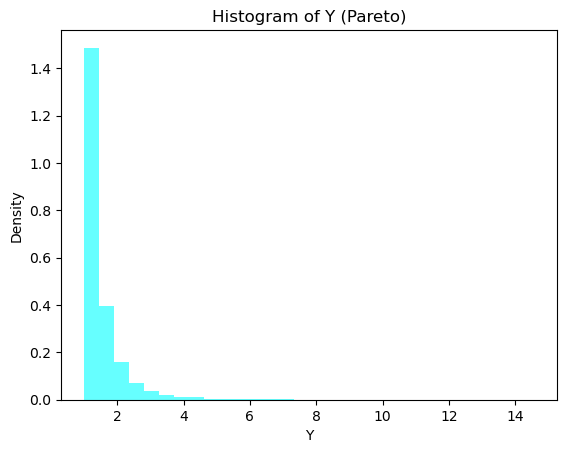

In [8]:
plt.hist(Y, bins=30, density=True, alpha=0.6, color='cyan')
plt.title('Histogram of Y (Pareto)')
plt.xlabel('Y')
plt.ylabel('Density')
plt.show()


- 3. Vérifier que pour
𝜌
≠
0,
𝑋
 et
𝑌 ne sont pas indépendants.

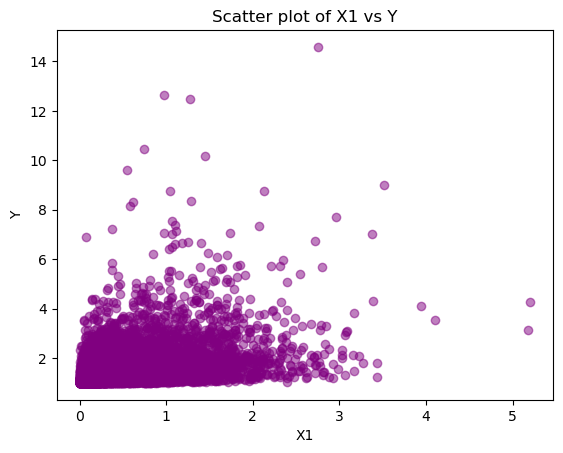

In [9]:
plt.scatter(X1, Y, alpha=0.5, color='purple')
plt.title('Scatter plot of X1 vs Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()


- Corrélation linéaire entre
𝑋
 et
𝑌


In [10]:
correlation = np.corrcoef(X1, Y)[0, 1]
print(f"Correlation between X1 and Y: {correlation}")


Correlation between X1 and Y: 0.4125100221749612


# Exercice 3:

- Étape 1 : Générer un vecteur gaussien X de matrice de covariance Γ

In [11]:
rho = 0.5
n = 3 
M = 10000 
Gamma = np.array([[1, rho], [rho, 1]])
L = np.linalg.cholesky(Gamma)
Z = np.random.normal(size=(M, 2))
X = Z @ L.T


-  Étape 2 : Générer une v.a.r. S de loi χ²

In [12]:
S = np.sum(np.random.normal(size=(M, n))**2, axis=1)

- Étape 3 : Calculer Y = X / sqrt(S / n)

In [13]:
Y = X / np.sqrt(S[:, np.newaxis] / n)


-  Étape 4 : Transformation en copule de Student


In [14]:
U = t.cdf(Y, df=n)  
U1 = U[:, 0]
V1 = U[:, 1]


- Étape 5 : Transformation en lois marginales

In [15]:
X1 = expon.ppf(U1, scale=1/2)
def qpareto(u, alpha=3):
    return (1 - u) ** (-1 / alpha)

Y1 = qpareto(V1)


Étape 6 : Vérifications et visualisations
- Histogramme de
𝑋
1


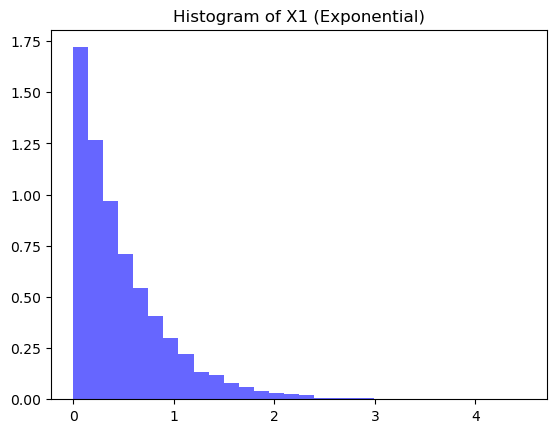

In [16]:
plt.hist(X1, bins=30, density=True, alpha=0.6, color='blue')
plt.title('Histogram of X1 (Exponential)')
plt.show()



- Histogramme de
𝑌
1


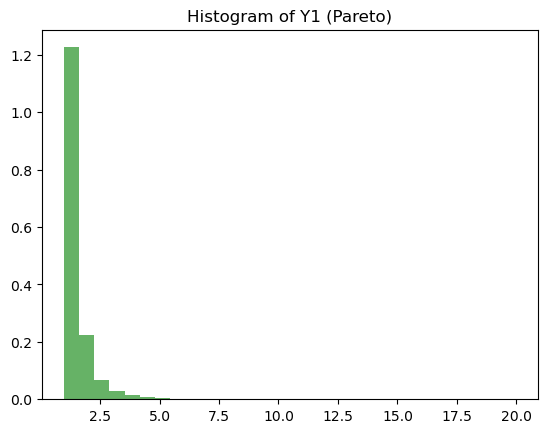

In [17]:
plt.hist(Y1, bins=30, density=True, alpha=0.6, color='green')
plt.title('Histogram of Y1 (Pareto)')
plt.show()


- Nuage de points
(
𝑋
1
,
𝑌
1
)


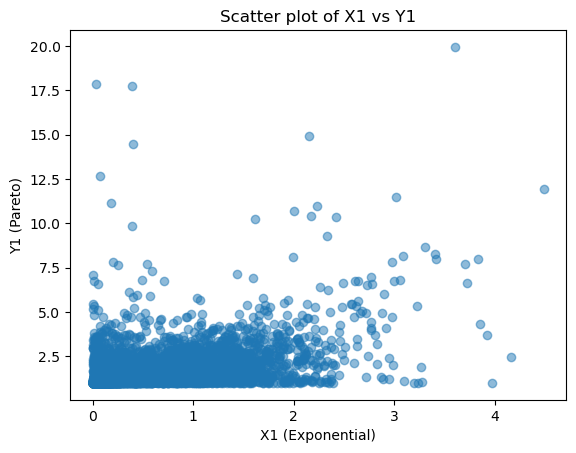

In [18]:
plt.scatter(X1, Y1, alpha=0.5)
plt.title('Scatter plot of X1 vs Y1')
plt.xlabel('X1 (Exponential)')
plt.ylabel('Y1 (Pareto)')
plt.show()

-  Corrélation

In [19]:
correlation = np.corrcoef(X1, Y1)[0, 1]
print(f"Correlation between X1 and Y1: {correlation}")

Correlation between X1 and Y1: 0.434620290804765
